In [1]:
import os, sys
sys.path.append(os.getcwd() + "/../src")
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection
from summaries import summarize_doc, summarize_doc_nmf

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [2]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description ILIKE('%REQUIREMENTS%');
        """
doc_ids, corpus_full = get_query_corpus(query, True)
# corpus = np.array([extract_requirements(doc) for doc in corpus_full])
corpus = corpus_full

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8851 documents loaded!


In [4]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
# tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

Loading ../output/CountVectorizer.pkl from cache...
 -> ../output/CountVectorizer.pkl loaded!
Loading ../output/TfidfTransformer.pkl from cache...
 -> ../output/TfidfTransformer.pkl loaded!
Loading ../output/tfidf_corpus.pkl from cache...
 -> ../output/tfidf_corpus.pkl loaded!


In [5]:
nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max(axis = 0)
W_normalized = W / W_max

Loading ../output/NMF.pkl from cache...
 -> ../output/NMF.pkl loaded!


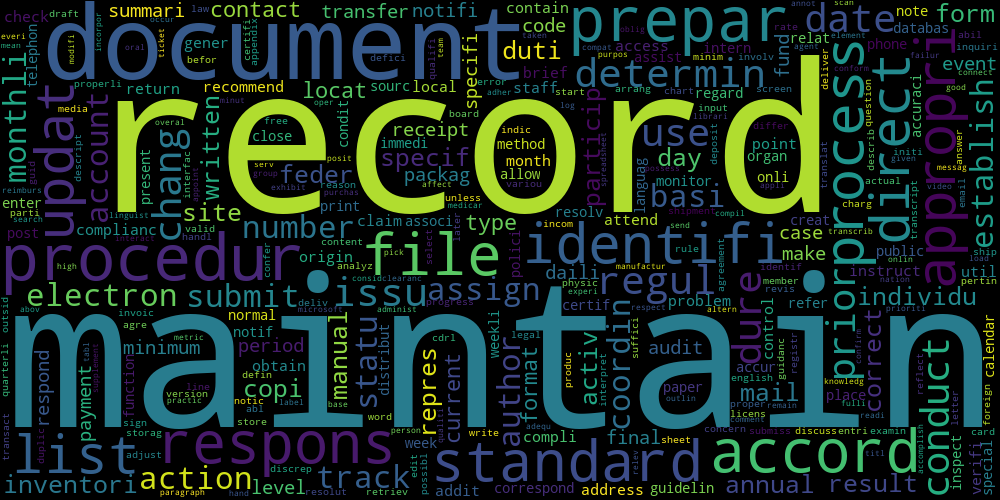

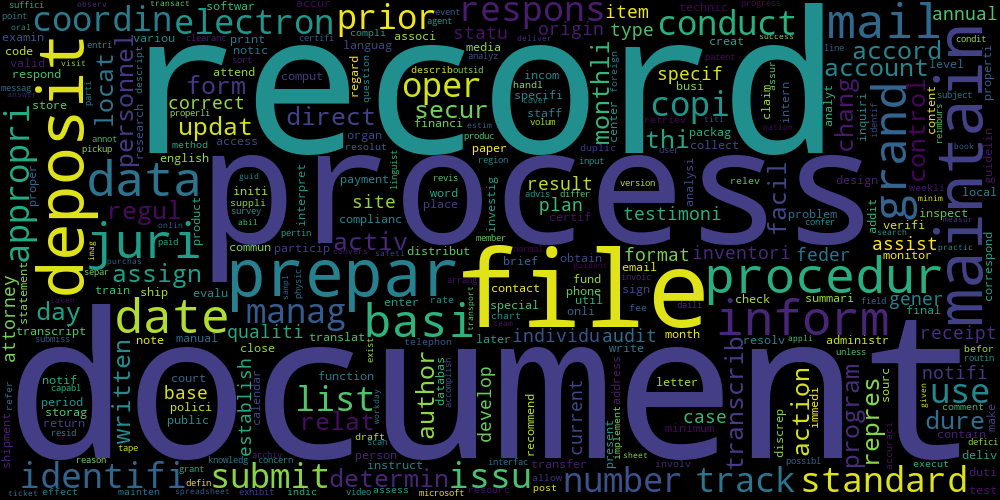

*************************************************************
33783 -> STRENGTH: 1.0 (0.0798)
SUMMARY:                                                                        
Syncrotech Software Coporation is fulfilling SPAWAR San Diego's requirement for financial support services for the 1.0 Finance Competency

BACKGROUND:
In 2001, SSC Pacific was one of four Navy pilots testing the feasibility of using a Commercial Off The Shelf (COTS) Enterprise Resource Planning solution for integrated financial, acquisition and management data entry and reporting

The pilot, called Project Cabrillo, proved the concept for the Echelon III Navy Working Capital fund, as a limited implementation of the financial, material management and project management modules of SAP

Based on the success of Cabrillo and the other pilots, the Navy has proceeded through the Navy ERP Program Office to deploy SAP with full integration of Financial, Funds Management, Project Systems, Controlling (cost), Workforce Manag

ICI Services Corporation is fulfilling the Department of the Navy, Space and Naval Warfare Systems Command requirement for financial support services for the 1.0 Finance Competency

BACKGROUND:
In 2001, SSC Pacific was one of four Navy pilots testing the feasibility of using a Commercial Off The Shelf (COTS) Enterprise Resource Planning solution for integrated financial, acquisition and management data entry and reporting

The pilot, called Project Cabrillo, proved the concept for the Echelon III Navy Working Capital fund, as a limited implementation of the financial, material management and project management modules of SAP

Based on the success of Cabrillo and the other pilots, the Navy has proceeded through the Navy ERP Program Office to deploy SAP with full integration of Financial, Funds Management, Project Systems, Controlling (cost), Workforce Management and Property Management to Naval System Commands beginning with the Naval Air Systems Command in October of 2007

SSC Pacific 

As a designated Head of Contracting Activity, NAVSUP is responsible for providing contracting authority and technical policy guidance to the Navy Field Contracting System

NAVSUP also administers the Navy Food Service Program, with responsibility for the policies and procedures that govern the day to day operations of general messes afloat and ashore

Function serves executive level positions including the Commanding and Executive Officers on a full time basis and is physically located in Building 204 Seal Beach site

Hours of operation coincide with schedule established by Regional Resources Site Manager
2.1.2.1.2 Provide Word Processing Support

Prepare official correspondence in accordance with format and style guidelines contained in SECNAVINST 5216.5 in its entirety

Preparation includes receiving input from a variety of sources including existing documents as templates, correcting errors (including format, spelling, and grammar), and printing of a “DRAFT” and “FINAL” version (as 

The US Department of Justice (DOJ), Drug Enforcement Administration (DEA) may have a continuing requirement for Regional Linguist Services (RLS) for the Atlanta Region

PREVIOUS REQUIREMENTS
Regional Linguist Services (RLS) for the Atlanta Region

The successful contractor will be responsible for providing required services to include, but not limited to:
Analysis
Methodically examine in detail the intercepted information in order to uncover the true meaning by deciphering any codes used in communication by drug traffickers to describe drugs, weapons, associates, activities, and law enforcement in attempts to defeat intercept surveillance
Process incoming data to determine the relationships between multiple targets, as well as determine the structure of Drug Trafficking Organizations (DTO)
Utilize data to determine the significance and hierarchy of targets involved
Cross reference current and past intelligence data to establish target patterns and connectivity with on-going intercepts


The US Department of Justice (DOJ), Drug Enforcement Administration (DEA), has a continuing requirement for Regional Linguist Services (RLS) for the Southeast Region

REQUIREMENTS
Regional Linguistic Services (RLS) for the
Southeast Region
The successful contractor will be responsible for providing required services to include, but not limited to:
Analysis
Methodically examine in detail the intercepted information in order to uncover the true meaning by deciphering any codes used in communication by drug traffickers to describe drugs, weapons, associates, activities, and law enforcement in attempts to defeat intercept surveillance
Process incoming data to determine the relationships between multiple targets, as well as determine the structure of Drug Trafficking Organizations (DTO)
Utilize data to determine the significance and hierarchy of targets involved
Cross reference current and past intelligence data to establish target patterns and connectivity with on-going intercepts
Create a

The US Department of Justice (DOJ), Drug Enforcement Administration (DEA), has a continuing requirement for Regional Linguist Services for the Northern West Coast Region

REQUIREMENTS
Regional Linguistic Services (RLS) for the
Northern West Coast Region
The successful contractor will be responsible for providing required services to include, but not limited to:
Analysis
Methodically examine in detail the intercepted information in order to uncover the true meaning by deciphering any codes used in communication by drug traffickers to describe drugs, weapons, associates, activities, and law enforcement in attempts to defeat intercept surveillance
Process incoming data to determine the relationships between multiple targets, as well as determine the structure of Drug Trafficking Organizations (DTO)
Utilize data to determine the significance and hierarchy of targets involved
Cross reference current and past intelligence data to establish target patterns and connectivity with on-going inter

The US Department of Justice (DOJ), Drug Enforcement Administration (DEA), has a continuing requirement for Regional Linguist Services (RLS) for the Southern West Coast Region

PREVIOUS REQUIREMENTS
DOJ/DEA has the following REQUIREMENTS:
Regional Linguistic Services (RLS) for the
Southern West Coast Region
The successfull contractor will be responsible for providing required services to include, but not limited to:
Analysis
Methodically examine in detail the intercepted information in order to uncover the true meaning by deciphering any codes used in communication by drug traffickers to describe drugs, weapons, associates, activities, and law enforcement in attempts to defeat intercept surveillance
Process incoming data to determine the relationships between multiple targets, as well as determine the structure of Drug Trafficking Organizations (DTO)
Utilize data to determine the significance and hierarchy of targets involved
Cross reference current and past intelligence data to establ

In [7]:
topic_i = 0

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))

for doc, strength in get_top_10_docs(W_normalized, topic_i):
    print("*************************************************************")
    print(doc_ids[doc], "-> STRENGTH:", round(strength, 2), f"({round(W[doc, topic_i], 4)})")
    print(summarize_doc_nmf(corpus[doc], tfidf, nmf, topic_i, n_sentences=100))
    #print(summarize_doc(doc))
    print()

In [ ]:
# topic_strengths = W.max(axis=0) / W.max()
# _ = plt.hist(topic_strengths, bins=20)
# for i, strength in enumerate(W.max(axis=0) / W.max()):
#     print(str(i).rjust(2, "0"), "->", str(round(strength, 2)).ljust(4, "0"))